# Project Extension #1: Nueral Network Dropout

### Part I: Creating a neural network with dropout using the tensorflow keras sequential model to check if adding dropout improves the accuracy of the homework implementation

#### Using the dataset from our original assignment - SciKit Learn's MNIST digits dataset:

In [1]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt

The shape of the digits dataset:
(1797, 64)


<Figure size 640x480 with 0 Axes>

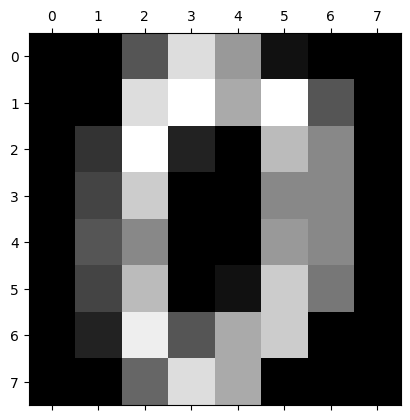

[0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [2]:
digits=load_digits()
X = digits.data
print("The shape of the digits dataset:") 
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()
y = digits.target
print(y[0:1])
print(X[0,:])

In [4]:
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

X[0,:] # Looking the new features after scaling

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [5]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [23]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, int(y[i])] = 1
    return y_vect

In [7]:
# convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [8]:
print(y_train[0:4])
print(y_v_train[0:4])

[3 6 0 7]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


##### Training the model and printing accuracy
##### Please note that the accuracy in the original assignment was ~85% while this implementation is ~96%

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = tf.keras.Sequential()

# Input layer
model.add(Dropout(.2, input_shape=(64,)))

# Hidden layer with dropout
model.add(Dense(30, activation='sigmoid'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='mse', metrics=['accuracy'])

model.fit(X_train, y_v_train, epochs=3000, batch_size=len(X_train), validation_data=(X_test, y_v_test))

Epoch 1/3000
1/1 [==============================] - 0s 262ms/step - loss: 0.3038 - accuracy: 0.1039 - val_loss: 0.2849 - val_accuracy: 0.1280
Epoch 2/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.2913 - accuracy: 0.1141 - val_loss: 0.2763 - val_accuracy: 0.1363
Epoch 3/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.2829 - accuracy: 0.1002 - val_loss: 0.2693 - val_accuracy: 0.1391
Epoch 4/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.2758 - accuracy: 0.1364 - val_loss: 0.2632 - val_accuracy: 0.1502
Epoch 5/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.2704 - accuracy: 0.1243 - val_loss: 0.2577 - val_accuracy: 0.1572
Epoch 6/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.2650 - accuracy: 0.1438 - val_loss: 0.2526 - val_accuracy: 0.1586
Epoch 7/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.2589 - accuracy: 0.1410 - val_loss: 0.2479 - val_accuracy: 0.1627
Epoch 8/3000

### Part II: Dropout implementation from scratch utilizing the original assignment dataset - SciKit Learn's MNIST digits dataset:

In [11]:
def f(z):
    return 1 / (1 + np.exp(-z))

def f_deriv(z):
    return f(z) * (1 - f(z))

In [12]:
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [13]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [14]:
import random
def dropout_mask(nn_structure, p1, p2):
    mask = []
    for i in range(len(nn_structure)-1):
        if i == 0:
            p = p1
        else:
            p = p2
        length1 = int(nn_structure[i]*p)
        length2 = nn_structure[i] - length1
        mask.append([0.0] * length1 + [1.0/(1.0-p)] * length2)
        random.shuffle(mask[i])
    return mask

In [15]:
def feed_forward(x, W, b, activation_func):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = activation_func(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def feed_forward_dmask(x, W, b, activation_func, dmask):
    a = {1: x}  # create a dictionary for holding the a values for all levels
    z = {}  # create a dictionary for holding the z values for all the layers

    # Loop for feed-forward
    for l in range(1, len(W) + 1):  # for each layer
        node_in = a[l]
        z[l + 1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l + 1] = activation_func(z[l + 1])  # a^(l+1) = f(z^(l+1))

        # Apply dropout to a^(l+1) if not the output layer
        if l < len(W):
            a[l + 1] *= dmask[l]

    return a, z

In [16]:
def calculate_out_layer_delta(y, a_out, z_out, derivative_func):
    return -(y-a_out) * derivative_func(z_out) 
def calculate_hidden_delta(delta_plus_1, w_l, z_l, dmask, derivative_func):
    return ((np.dot(np.transpose(w_l), delta_plus_1)*(dmask))) * derivative_func(z_l)

In [17]:
def train_nn_dropout(nn_structure, X, y, lam, activation_func, derivative_func, iter_num=3000, alpha=0.25, inputP=.2, outputP=.2, setup_and_init_weights=setup_and_init_weights):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0

        dmask = dropout_mask(nn_structure, inputP, outputP)
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            x_mask = X[i, :]*dmask[0]
            a, z = feed_forward_dmask(x_mask, W, b, activation_func, dmask)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l],derivative_func) 
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l], dmask[l-1], derivative_func)
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l] + lam*W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers, activation_func):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b, activation_func)
        y[i] = np.argmax(a[n_layers])
    return y

In [18]:
nn_structure = [64, 30, 10]

# train the NN
W, b, avg_cost_func = train_nn_dropout(nn_structure, X_train, y_v_train,0, f, f_deriv, 10000, alpha=.5)
y_pred = predict_y(W, b, X_test, 3, f)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Starting gradient descent for 10000 iterations
Iteration 0 of 10000
Iteration 1000 of 10000
Iteration 2000 of 10000
Iteration 3000 of 10000
Iteration 4000 of 10000
Iteration 5000 of 10000
Iteration 6000 of 10000
Iteration 7000 of 10000
Iteration 8000 of 10000
Iteration 9000 of 10000
Prediction accuracy is 95.2712100139082%


### Part III: Homework assignment implementation on a new dataset - kmnist dataset of Japanese (Hiragana) characters

Train images shape: (1400, 784)
Train labels shape: (1400,)


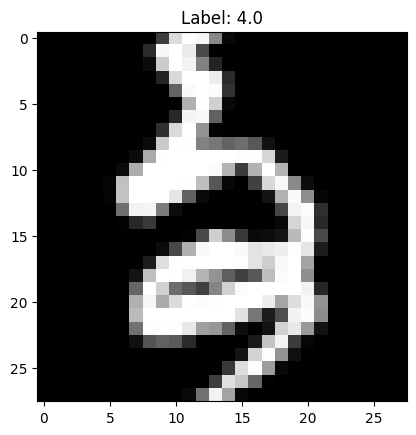

In [24]:
import tensorflow_datasets as tfds

dataset= tfds.load('kmnist', split='train', with_info=False)

X, y = [], []

for example in dataset:
    X.append(example['image'])
    y.append(example['label'])

X = np.array(X)
y = np.array(y).reshape((len(y),1))

X = X / 255.0

X = X.reshape(X.shape[0], -1)

Xy = np.append(X, y, axis = 1)

np.random.shuffle(Xy)

X = Xy[0:1400, 0:len(X[0])]
y = Xy[0:1400, len(X[0])]

# Display information about the dataset
print("Train images shape:", X.shape)
print("Train labels shape:", y.shape)

img = X[0].reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [25]:
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

X[0,:] # Looking the new features after scaling

print(X.shape)

(1400, 784)


In [26]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [27]:
# convert digits to vectors
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [28]:
def calculate_out_layer_delta(y, a_out, z_out, derivative_func):
    return -(y-a_out) * derivative_func(z_out) 

def calculate_hidden_delta(delta_plus_1, w_l, z_l, derivative_func):
    return np.dot(np.transpose(w_l), delta_plus_1) * derivative_func(z_l)

def train_nn(nn_structure, X, y, lam, activation_func, derivative_func, iter_num=3000, alpha=0.25,setup_and_init_weights=setup_and_init_weights):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b, activation_func)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l],derivative_func) 
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l],derivative_func)
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l] + lam*W[l]) 
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000


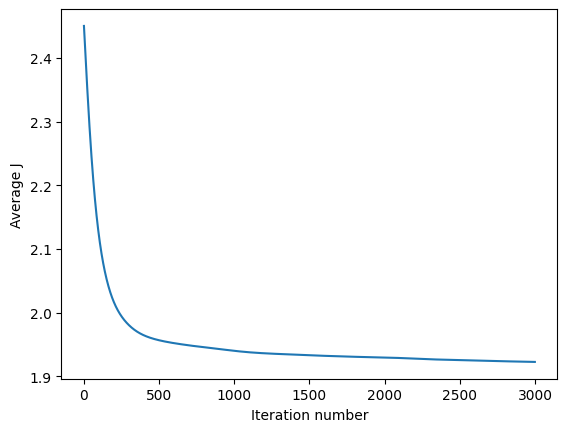

Prediction accuracy is 15.892857142857142%


In [30]:
nn_structure = [784, 80, 10]
    
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train,0, f, f_deriv, 3000)

# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3, f)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

### Part IV: Dropout implementation from scratch on new dataset

In [31]:
def calculate_out_layer_delta(y, a_out, z_out, derivative_func):
    return -(y-a_out) * derivative_func(z_out) 
def calculate_hidden_delta(delta_plus_1, w_l, z_l, dmask, derivative_func):
    return ((np.dot(np.transpose(w_l), delta_plus_1)*(dmask))) * derivative_func(z_l)

In [32]:
nn_structure = [784, 80, 10]

# train the NN
W, b, avg_cost_func = train_nn_dropout(nn_structure, X_train, y_v_train,0, f, f_deriv, 3000, alpha=.5)
y_pred = predict_y(W, b, X_test, 3, f)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy is 15.0%
